# Problem Definition 

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# Methodolgy 

To solve this problem, we have used machine learning pipeline.First we have imported the required libraries and the dataset. And then we have done exploratory data analysis to see if we can find any trends in the dataset. Next, we have performed text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally, we have used machine learning algorithms to train and test our models.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

!pip install -U textblob
!python -m textblob.download_corpora

from textblob import TextBlob

! mkvirtualenv keras -p python3
import re
import string
import heapq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
##Loading the dataset
tweet = pd.read_csv('C:/Users/Archana/Documents/Business Analytics/Q4/Text Mining/Final Project/Datasets/twitter-airline-sentiment/Tweets.csv')

In [3]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Data Analysis

## Check the shape of data and if it has any null values

In [4]:
tweet.shape

(14640, 15)

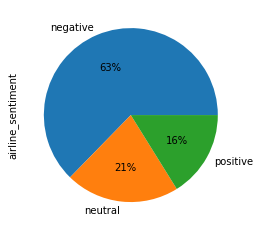

In [5]:
##Check the count for airline_sentiment

tweet.airline_sentiment.value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

##### Here we can see that the majority of tweets are negatives in the dataset. Now let us explore more on how these tweets are distributed among the different airlines

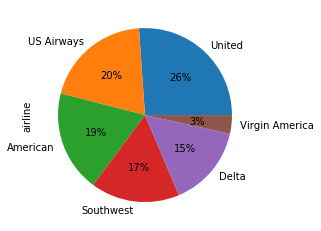

In [6]:
tweet.airline.value_counts().plot(kind = 'pie', autopct = '%0.0f%%')

##### Here it can be seen that United Airlines has maximum number tweets followed by US Airways and American. Now let us explore how this sentiment tweets are distributed among each airline.

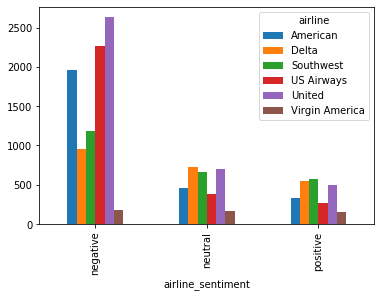

In [7]:
airline_sentiment_tweets = tweet.groupby(['airline_sentiment', 'airline']).airline_sentiment.count().unstack()
airline_sentiment_tweets.plot(kind = 'bar')

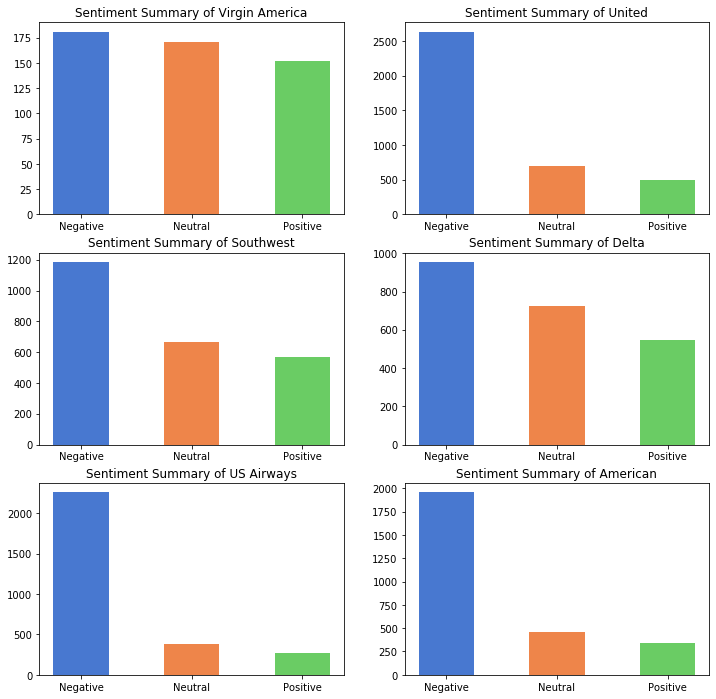

In [8]:
def plot_sub_sentiment(Airline):
    pdf = tweet[tweet['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("muted")
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = tweet['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

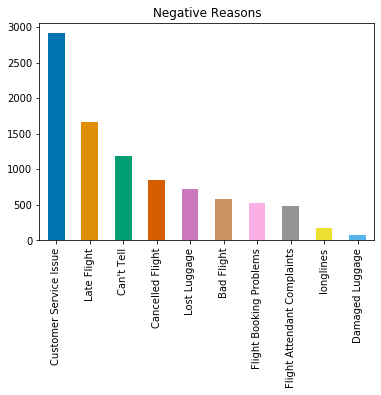

In [9]:
color = sns.color_palette("colorblind")
tweet.negativereason.value_counts().plot(kind = 'bar', title = "Negative Reasons", color = color)


## Word Cloud for negative Tweets

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
airline_tweets= tweet [tweet ['airline_sentiment']=='negative']
words = ' '.join(airline_tweets ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])


In [12]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

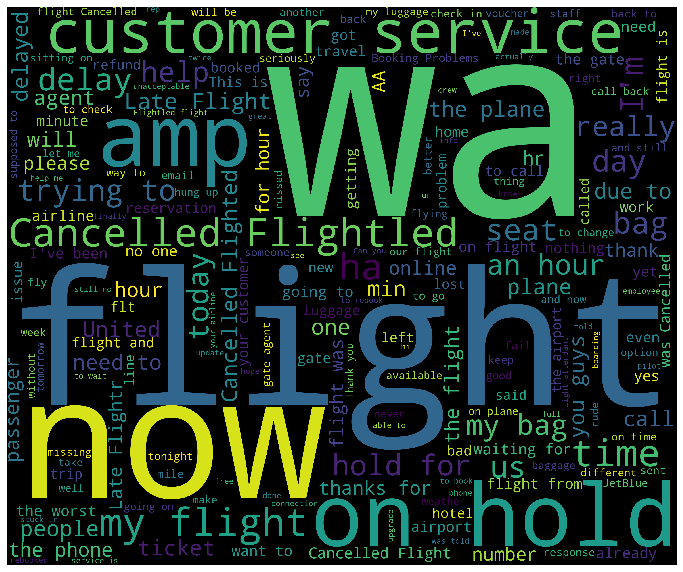

In [13]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
airline_tweets=tweet [tweet ['airline_sentiment']=='positive']
words = ' '.join(airline_tweets ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [15]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

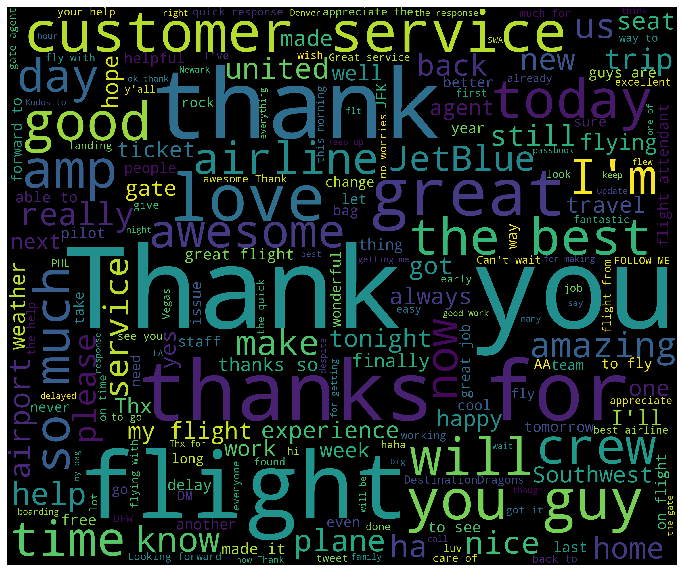

In [16]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

!pip install -U textblob
!python -m textblob.download_corpora

from textblob import TextBlob

! mkvirtualenv keras -p python3
import re
import string
import heapq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import nltk


Requirement already up-to-date: textblob in c:\users\archana\anaconda3\lib\site-packages (0.15.3)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already

## Data Cleaning

In [18]:
data = tweet[['text', 'airline_sentiment']]

In [19]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [20]:
data['text'][2]

"@VirginAmerica I didn't today... Must mean I need to take another trip!"

In [21]:
#def remove_stopwords(text):
 #   stop = nltk.corpus.stopwords.words('english')
  ## stop.append(punc)
    #whitelist = ["n't", "not","no"]
    #filter_words = []
    #words = nltk.word_tokenize(text)
    #for word in words:
     #   if word not in stop or word not in whitelist and len(word)>1:
      #      filter_words.append(word)
       # return " ".join(filter_words)
            

In [22]:
#remove_stopwords(data['text'][5])

In [23]:
def remove_stopwords(inp_text):
    stop = nltk.corpus.stopwords.words('english')
    punc = string.punctuation
    stop.append(punc)
    whitelist = ["n't", "not", "no"]
    clean_words = []
    words = nltk.word_tokenize(inp_text)
    for word in words:
        if word not in stop or word not in whitelist and len(word)>1:
            clean_words.append(word)
    return " ".join(clean_words)

In [24]:
remove_stopwords(data['text'][5])

"@ VirginAmerica seriously would pay $ 30 flight for seats that did n't have this playing . it 's really the only bad thing about flying VA"

In [25]:
def remove_mentions(text):
    return re.sub(r'@ \w+',' ', text)

In [26]:
data['text'] = data.text.apply(remove_stopwords).apply(remove_mentions)

C:\Users\Archana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
data.head()

,text,airline_sentiment
0,What said .,neutral
1,plus you 've added commercials to the experi...,positive
2,I did n't today ... Must mean I need to take...,neutral
3,it 's really aggressive to blast obnoxious `...,negative
4,and it 's really big bad thing about it,negative


In [28]:
features = tweet.iloc[:, 10].values
labels = tweet.iloc[:, 1].values

In [29]:
features

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [30]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

In [31]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    

### Represtig text to numeric form

#### We have three different approaches to do this. Bag of words, tf-idf and wordtovectorize. Here we are using tf-idf approach. 

## Tf-IDF
#### In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

#### TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

#### TF = (Frequency of a word in the document)/(Total words in the document) IDF = Log((Total number of docs)/(Number of docs containing the word))

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Archana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Splitting data into Training and Testing Set

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

### After splitting our datasets now we will train our data using various models. 

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Predicting and evaluating the model

In [35]:
predictions = text_classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


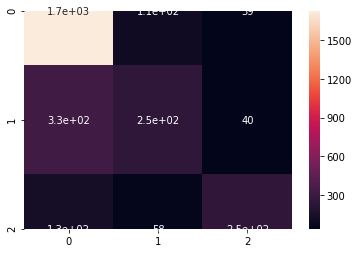

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### Logistic Regression Classifier

In [38]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions_LR = LR.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions_LR))
print(classification_report(y_test, predictions_LR))
print(accuracy_score (y_test, predictions_LR))

[[1764   83   23]
 [ 311  261   42]
 [ 136   50  258]]
              precision    recall  f1-score   support

    negative       0.80      0.94      0.86      1870
     neutral       0.66      0.43      0.52       614
    positive       0.80      0.58      0.67       444

    accuracy                           0.78      2928
   macro avg       0.75      0.65      0.69      2928
weighted avg       0.77      0.78      0.76      2928

0.7797131147540983


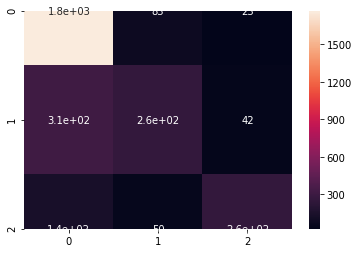

In [41]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions_LR), annot=True)

### Multinomial Naive Bayes Model

In [42]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
predictions_NB = multi_nb.predict(X_test)

In [44]:

print(confusion_matrix(y_test, predictions_NB))
print(classification_report(y_test, predictions_NB))
print(accuracy_score (y_test, predictions_NB))

[[1823   40    7]
 [ 388  204   22]
 [ 213   38  193]]
              precision    recall  f1-score   support

    negative       0.75      0.97      0.85      1870
     neutral       0.72      0.33      0.46       614
    positive       0.87      0.43      0.58       444

    accuracy                           0.76      2928
   macro avg       0.78      0.58      0.63      2928
weighted avg       0.76      0.76      0.73      2928

0.7581967213114754


In [ ]:
#from sklearn import svm
#from sklearn.multiclass import OneVsRestClassifier
#clf = OneVsRestClassifier(svm.SVC(gamma = 0.01, C = 100., probability = True, class_weight = 'balanced', kernel = 'linear'))
#clf.fit(X_train, y_train)

### OneVsRest Classifier

In [ ]:
#predictions_svm = clf.predict(X_test)

In [39]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, predictions_svm))
#print(classification_report(y_test, predictions_svm))
#print(accuracy_score (y_test, predictions_svm))

NameError: name 'predictions_svm' is not defined

### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion="gini")

DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
predictions_DTC = DTC.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, predictions_DTC))
print(classification_report(y_test, predictions_DTC))
print(accuracy_score (y_test, predictions_DTC))

[[1453  302  115]
 [ 270  287   57]
 [ 119   83  242]]
              precision    recall  f1-score   support

    negative       0.79      0.78      0.78      1870
     neutral       0.43      0.47      0.45       614
    positive       0.58      0.55      0.56       444

    accuracy                           0.68      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.68      0.68      0.68      2928

0.6769125683060109


### Model comparsion

In [48]:
print(f'Accuracy for Multinomial Naive Bayes: {round(accuracy_score (y_test, predictions_NB)*100, 4)}%')
#print(f'Accuracy for OnevsRestClassifier: {round(accuracy_score(y_test, predictions_svm)*100,4)}%')
print(f'Accuracy for Random Forest Classifier : {round(accuracy_score(y_test, predictions)*100, 4)}%')
print(f'Accuracy for Logistic Regression Classifier : {round(accuracy_score (y_test, predictions_LR)*100, 4)}%')
print(f'Accuracy for Decision Tree Classifier : {round(accuracy_score (y_test, predictions_DTC)*100,4)}%')

Accuracy for Multinomial Naive Bayes: 75.8197%
Accuracy for Random Forest Classifier : 75.9904%
Accuracy for Logistic Regression Classifier : 77.9713%
Accuracy for Decision Tree Classifier : 67.6913%


# END OF PROJECT